> ### EEE4423: Deep Learning Lab

# LAB \#14: CycleGAN

<h4><div style="text-align: right"> Due date: JUNE 10, 2022.  </div> <br>
<div style="text-align: right"> Please upload your file @ LearnUs in the form of [ID_Name_Lab14.ipynb]. </div></h4>

### *Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically.**</span> 
- Each team must write their own answers and codes (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[2019142079] [성재진]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2023-06-08 04:10:28.716602


## 1. Implementation for CycleGAN
>
>
> <img src="https://camo.githubusercontent.com/16fa02525bf502bec1aac77a3eb5b96928b0f25d73f7d9dedcc041ba28c38751/68747470733a2f2f6a756e79616e7a2e6769746875622e696f2f4379636c6547414e2f696d616765732f7465617365725f686967685f7265732e6a7067" alt="no_image" style="width: 800px;"/><br>
>
> * Cycle GAN leverages a cycle consistency in image-to-image translation
> * Unlike a conditional GAN, the cycle GAN considers <U>unpaired training data</U>
>
> **1. Dataset**
>
>   * MNIST dataset
>   * SVHN dataset
>   * Note that the MNIST data is gray, where the number of the channel is 1
>
> **2. Network architecture**
>
>   * **Overall architecture**
>
> <img src="https://hardikbansal.github.io/CycleGANBlog/images/model.jpg" alt="no_image" style="width: 600px;"/><br>
> <img src="https://hardikbansal.github.io/CycleGANBlog/images/model1.jpg" alt="no_image" style="width: 600px;"/><br>
>   * **Generative model G**
>     * Xavier initialization (Glorot & Bengio [3])
>       * It makes sure the weights to keep the propagation in a reasonable range through many layers
>       * $V(W)= {2 \over n_{in}+n_{out}}$
>       * Use <code>nn.init.xavier_uniform_</code> for the Xavier initialization
>
>     * The generative model has three components:
>       1. Encoder: 
>         * Convolutional network for feature extracting
>         * 2 convolutional layers and 2 LeakyReLU activations
>         * The output channel sizes are 64, 128 respectively<br>
>         * The kernel size of the convolutional layers are 7 and 3, respectively<br>
>            (You can use different sizes whatever you want, but we recommend those sizes)
>         * All the strides are 2
>         * Use batch normalization except for the first layer
>
>       2. Transformer: 
>         * Learn how it would like to transform the feature vector of and image from A to B. <br> 
>         * Use the resnet blok which contains the skip-connetction between the input and output for transformation<br>
>            (Please refer to <U>He et al.</U>[3])
>         * 3 resnet block layers and each of layer is followed by LeakyReLU activation
>         * All the output channel sizes are 128
>         * All the kernel sizes and strides are 3 and 1, respectively
>      
>       3. Decoder: 
>         * Upconvolutional network for reconstructing an image
>         * 2 upconvolutional layers, one LeakyReLU activations, and one Tanh activation which is for the last layer
>         * The output channel sizes are 128, 64, and 3, respectively for the SVHN data, and 128, 64, and 1, respectively for the MNIST data <br>
>         * All the kernel sizes and strides are 4 and 2, respectively
>         * Use batch normalization except for the last layers
>
>
>
> <img src="https://hardikbansal.github.io/CycleGANBlog/images/Generator.jpg" alt="no_image" style="width: 800px;"/><br>
>
>
>   * **Discriminative model D**
>     * Xavier Initialization
>     * It contains 4 convolutional layers, 3 LeakyReLU activations, and one Sigmoid activation which is for the last layer
>     * The output channel sizes are 64, 128, 256, and 1, respectively
>     * All the kernel sizes are 4 except for the last kernel size which is 1
>     * The strides from the first two layers are 2 and the rest of them are 1
>     * Use batch normalization([4]) except for the first and last layers
>
>
>
> <img src="https://hardikbansal.github.io/CycleGANBlog/images/discriminator.jpg" alt="no_image" style="width: 600px;"/><br>
>
>
> **3. Loss function**<br>
> (In the paper, the authors use the L2 loss for the GAN loss, but the binary cross entropy loss also works well)
>  * **Discriminative model $D_X$ and $D_Y$**
>    * The loss for $D_Y$ is followed as<br>
>      * Binary cross entropy loss for the real data
>      * Binary cross entropy loss for the fake data <br>
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_Y(y_i))+(1-l_i^{real})log(1-D_Y(y_i)) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{fake}log(D_Y(G_Y(x_i)))+(1-l_i^{fake})log(1-D_Y(G_Y(x_i)))$ <br>
>
>  *
>    * The loss for $D_Y$ is followed as<br>
>      * Binary cross entropy loss for the real data
>      * Binary cross entropy loss for the fake data <br>
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_X(x_i))+(1-l_i^{real})log(1-D_X(x_i)) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{fake}log(D_X(G_X(y_i)))+(1-l_i^{fake})log(1-D_X(G_X(y_i)))$ <br>
>
>    ($l_i^{real}=1, l_i^{fake}=0$) <br>
>    ($G_Y$ is the generator where $x_i$ translate to $y_i$ and vice versa)
>
>
>  * **Generative model $G_X$ and $G_Y$**<br>
>
>      * Binary cross entropy loss for the real data (It is actually fake)
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_X(G_X(y_i)))+(1-l_i^{real})log(1-D_X(G_X(y_i))) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_Y(G_Y(x_i)))+(1-l_i^{real})log(1-D_Y(G_Y(x_i))) $ <br>
>
>    ($l_i^{real}=1$)
>    
>      * The cycle loss for measuring difference between $x_i$ and $G_Y(G_X(x_i))$ and vice versa
>
>    $-{1 \over N} \sum^{N}_{i=1} \lvert\lvert G_Y(G_X(y_i))-y_i \rvert\rvert_1$ <br>
>    $-{1 \over N} \sum^{N}_{i=1} \lvert\lvert G_X(G_Y(x_i))-x_i \rvert\rvert_1$

## 2. Cycle GAN with Pytorch

In [2]:
import os
import os.path as osp
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Parameter Setting
* You can adjust the parameters to yourself

In [3]:
print('STEP 0: PARAMETER SETTING')

# Data root directory
train_X_root = './dataset-dllab/lab14/mnist/'
train_Y_root = './dataset-dllab/lab14/svhn/'

# Weight save directory
vis_num = 2
save_dir = './weights/lab14/cyclegan'
if not osp.exists(save_dir):
    os.makedirs(save_dir)

# Batch size during training
bs = 64

# Size of image
img_height = 32
img_width = 32
img_size = 32
img_channel = 3

# Channels of generator feature
gfc = 64

# Channels of discriminator feature
dfc = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizing
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Real or Fake label
real_label = 1
fake_label = 0

STEP 0: PARAMETER SETTING


In [4]:
print('STEP 1: LOADING DATASET')

transform_1ch = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

transform_3ch = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_X_set = dset.MNIST(root=train_X_root,
                         train=True,
                         transform=transform_1ch,
                         download=False)
train_Y_set = dset.SVHN(root=train_Y_root,
                        split='train',
                        transform=transform_3ch,
                        download=False)
test_X_set = dset.MNIST(root=train_X_root,
                         train=False,
                         transform=transform_1ch,
                         download=False)
test_Y_set = dset.SVHN(root=train_Y_root,
                        split='test',
                        transform=transform_3ch,
                        download=False)

STEP 1: LOADING DATASET


In [5]:
print('STEP 2: MAKING DATASET ITERABLE')

train_X_loader = torch.utils.data.DataLoader(train_X_set,
                                             batch_size=bs, 
                                             shuffle=True,
                                             drop_last=True)

train_Y_loader = torch.utils.data.DataLoader(train_Y_set,
                                             batch_size=bs, 
                                             shuffle=True,
                                             drop_last=True)

test_X_loader = torch.utils.data.DataLoader(test_X_set,
                                             batch_size=bs, 
                                             shuffle=False,
                                             drop_last=True)

test_Y_loader = torch.utils.data.DataLoader(test_Y_set,
                                             batch_size=bs, 
                                             shuffle=False,
                                             drop_last=True)

STEP 2: MAKING DATASET ITERABLE


### Visualize a few images

In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

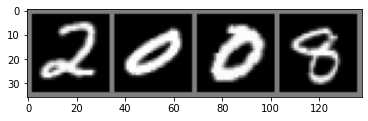

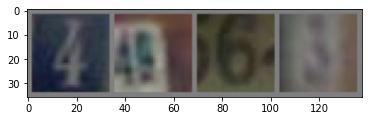

In [7]:
data_loader_X_sample = torch.utils.data.DataLoader(train_X_set,
                                                 batch_size=4, 
                                                 shuffle=True)
data_loader_Y_sample = torch.utils.data.DataLoader(train_Y_set,
                                                 batch_size=4, 
                                                 shuffle=True)

# Get a batch of training data
X = next(iter(data_loader_X_sample))
Y = next(iter(data_loader_Y_sample))

# Make a grid from batch
out_X = torchvision.utils.make_grid(X[0])
out_Y = torchvision.utils.make_grid(Y[0])

imshow(out_X)
imshow(out_Y)

### Utils 
* Use the below code for the convolution or the upconvolution

### *References*
[1] Zhu et al., "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks", *ICCV*, 2017. <br>
[2] https://hardikbansal.github.io/CycleGANBlog/ <br>
[3] Glorot & Bengio, "Understanding the difficulty of training deep feedforward neural networks", *AISTATS* 2010. <br>
[4] Ioffe & Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", *ICML* 2015.

In [8]:
def conv2d(params_list, batch_norm = True):
    channel_in, channel_out, kernel_size, stride, padding, activation = params_list
    layers = []
    if batch_norm:
        layers += [nn.Conv2d(channel_in, channel_out, kernel_size, stride, padding, bias=False),
                   nn.BatchNorm2d(channel_out)]
        nn.init.xavier_uniform_(layers[0].weight)
    else:
        layers += [nn.Conv2d(channel_in, channel_out, kernel_size, stride, padding, bias=False)]
        nn.init.xavier_uniform_(layers[0].weight)
        
    if activation.lower() == 'relu':
        layers += [nn.ReLU(inplace=True)]
    if activation.lower() == 'leakyrelu':
        layers += [nn.LeakyReLU(0.2, inplace=True)]
    if activation.lower() == 'tanh':
        layers += [nn.Tanh()]
    if activation.lower() == 'sigmoid':
        layers += [nn.Sigmoid()]
        
    return nn.Sequential(*layers)
        
def upconv2d(params_list, batch_norm = True):
    channel_in, channel_out, kernel_size, stride, padding, activation = params_list
    layers = []
    if batch_norm:
        layers += [nn.ConvTranspose2d(channel_in, channel_out, kernel_size, stride, padding, bias=False),
                   nn.BatchNorm2d(channel_out)]
        nn.init.xavier_uniform_(layers[0].weight)
    else:
        layers += [nn.ConvTranspose2d(channel_in, channel_out, kernel_size, stride, padding, bias=False)]
        nn.init.xavier_uniform_(layers[0].weight)
        
    if activation.lower() == 'relu':
        layers += [nn.ReLU(inplace=True)]
    if activation.lower() == 'leakyrelu':
        layers += [nn.LeakyReLU(0.2, inplace=True)]
    if activation.lower() == 'tanh':
        layers += [nn.Tanh()]
    if activation.lower() == 'sigmoid':
        layers += [nn.Sigmoid()]
        
    return nn.Sequential(*layers)

def transpose(ndarray):
    return np.transpose(ndarray, [0,2,3,1])

def gray2rgb(ndarray):
    return np.concatenate((ndarray, ndarray, ndarray), axis=2)

### 2.1 Write the code (Generator) [3 points]
* You need to set the hyperparameters for implementing the upconvolutions (params_list)
* There are 'ReLU', 'LeakyReLU', 'Tanh', and 'Sigmoid' for the activation functions
* If you do not want to use the activation function, just put '' in the position of the activation function
* Other parameters, such as paddings, can be determined by calculating the formulation of convolutional process<br>
  (See in https://pytorch.org/docs/stable/nn.html)
* You have to use the functions **conv2d()** or **upconv2d()** which are defined from above

In [9]:
print('STEP 3-1: CREATE MODEL CLASS (Generator)')


# [input channels, output channels, kernel_size, strides, paddings]
#padding등의 값은 계산하여 적절한 값을 구하여 집어넣어주었다.
cfg_g_enc_X = [[1,gfc,7,2,3,'leakyrelu'], [gfc,2*gfc,3,2,1,'leakyrelu']]
cfg_g_enc_Y = [[3,gfc,7,2,3,'leakyrelu'], [gfc,2*gfc,3,2,1,'leakyrelu']]
cfg_g_trans = [[2*gfc,2*gfc,3,1,1,'leakyrelu'], [2*gfc,2*gfc,3,1,1,'leakyrelu'], [2*gfc,2*gfc,3,1,1,'leakyrelu']]
cfg_g_dec_X = [[2*gfc,gfc,4,2,1,'leakyrelu'], [gfc,3,4,2,1,'tanh']]
cfg_g_dec_Y = [[2*gfc,gfc,4,2,1,'leakyrelu'], [gfc,1,4,2,1,'tanh']]


class Generator_X(nn.Module):
    def __init__(self):
        super(Generator_X, self).__init__()
        
        #############
        
        #encoder
        self.enc1=conv2d(cfg_g_enc_X[0],batch_norm=False)
        self.enc2=conv2d(cfg_g_enc_X[1],batch_norm=True)
        
        #transformer
        #layer가 2개인 resnet block 3개
        self.res1=nn.Sequential(
        conv2d(cfg_g_trans[0],batch_norm=True),
        conv2d(cfg_g_trans[0],batch_norm=True)
        )
        self.res2=nn.Sequential(
        conv2d(cfg_g_trans[1],batch_norm=True),
        conv2d(cfg_g_trans[1],batch_norm=True)
        )
        self.res3=nn.Sequential(
        conv2d(cfg_g_trans[2],batch_norm=True),
        conv2d(cfg_g_trans[2],batch_norm=True)
        )
        
        #decoder
        self.dec1=upconv2d(cfg_g_dec_X[0])
        self.dec2=upconv2d(cfg_g_dec_X[1],batch_norm=False)
        #############
        
    def forward(self, x):
        
        #############
        enc_1=self.enc1(x)
        enc_out=self.enc2(enc_1)

        res_1=self.res1(enc_out)+enc_out
        res_2=self.res2(res_1)+res_1
        res_out=self.res3(res_2)+res_2
        
        dec1=self.dec1(res_out)
        output=self.dec2(dec1)
        return output
        #############
    
class Generator_Y(nn.Module):
    def __init__(self):
        super(Generator_Y, self).__init__()
        
        #############
        #encoder
        self.enc1=conv2d(cfg_g_enc_Y[0],batch_norm=False)
        self.enc2=conv2d(cfg_g_enc_Y[1],batch_norm=True)
        
        #transformer
        self.res1=nn.Sequential(
        conv2d(cfg_g_trans[0],batch_norm=True),
        conv2d(cfg_g_trans[0],batch_norm=True)
        )
        self.res2=nn.Sequential(
        conv2d(cfg_g_trans[1],batch_norm=True),
        conv2d(cfg_g_trans[1],batch_norm=True)
        )
        self.res3=nn.Sequential(
        conv2d(cfg_g_trans[2],batch_norm=True),
        conv2d(cfg_g_trans[2],batch_norm=True)
        )
        
        #decoder
        self.dec1=upconv2d(cfg_g_dec_Y[0])
        self.dec2=upconv2d(cfg_g_dec_Y[1],batch_norm=False)
        #############
        
        
    def forward(self, x):
        
        #############
        enc_1=self.enc1(x)
        enc_out=self.enc2(enc_1)

        res_1=self.res1(enc_out)+enc_out
        res_2=self.res2(res_1)+res_1
        res_out=self.res3(res_2)+res_2
        
        dec1=self.dec1(res_out)
        output=self.dec2(dec1)
        return output
        #############  
        

STEP 3-1: CREATE MODEL CLASS (Generator)


### 2.2 Write the code (Discriminator) [3 points]
* You need to set the hyperparameters for implementing the convolutions (params_list)
* There are 'ReLU', 'LeakyReLU', 'Tanh', and 'Sigmoid' for the activation functions
* If you do not want to use the activation function, just put '' in the position of the activation function
* Other parameters, such as paddings, can be determined by calculating the formulation of convolutional process<br>
  (See in https://pytorch.org/docs/stable/nn.html)
* You have to use the functions **conv2d()** or **upconv2d()** which are defined from above

In [10]:
print('STEP 3-2: CREATE MODEL CLASS (Discriminator)')


# [input channels, output channels, kernel_size, strides, paddings]
#padding등의 값은 계산하여 적절한 값을 구하여 집어넣어주었다.
cfg_d_X = [[1,gfc,4,2,0,'leakyrelu'], [gfc,2*gfc,4,2,1,'leakyrelu'], [2*gfc,4*gfc,4,1,1,'leakyrelu'], [4*gfc,1,1,1,1,'sigmoid']]
cfg_d_Y = [[3,gfc,4,2,0,'leakyrelu'], [gfc,2*gfc,4,2,1,'leakyrelu'], [2*gfc,4*gfc,4,1,1,'leakyrelu'], [4*gfc,1,1,1,1,'sigmoid']]


class Discriminator_X(nn.Module):
    def __init__(self):
        super(Discriminator_X, self).__init__()
        
        #############
        #주어진 사항대로 4개의 convolution layer를 사용한다.
        self.conv1=conv2d(cfg_d_X[0],batch_norm=False)
        self.conv2=conv2d(cfg_d_X[1],batch_norm=True)
        self.conv3=conv2d(cfg_d_X[2],batch_norm=True)
        self.conv4=conv2d(cfg_d_X[3],batch_norm=False)
        #############
        
    def forward(self, x):
        
        #############
        output=self.conv1(x)
        output=self.conv2(output)
        output=self.conv3(output)   
        output=self.conv4(output)

        return output
        #############
    
class Discriminator_Y(nn.Module):
    def __init__(self):
        super(Discriminator_Y, self).__init__()
        
        #############
        #주어진 사항대로 4개의 convolution layer를 사용한다.
        self.conv1=conv2d(cfg_d_Y[0],batch_norm=False)
        self.conv2=conv2d(cfg_d_Y[1],batch_norm=True)
        self.conv3=conv2d(cfg_d_Y[2],batch_norm=True)
        self.conv4=conv2d(cfg_d_Y[3],batch_norm=False)
        #############
        
    def forward(self, x):
        
        #############
        output=self.conv1(x)
        output=self.conv2(output)  
        output=self.conv3(output)
        output=self.conv4(output)
        
        return output
        #############
        

STEP 3-2: CREATE MODEL CLASS (Discriminator)


In [11]:
print('STEP 4: INSTANTIATE MODEL CLASS')


model_G_X = Generator_X()
model_G_Y = Generator_Y()
model_D_X = Discriminator_X()
model_D_Y = Discriminator_Y()


#######################
#  USE GPU FOR MODEL  #
#######################


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_G_X.to(device)
print(model_G_X)
model_G_Y.to(device)
print(model_G_Y)
model_D_X.to(device)
print(model_D_X)
model_D_Y.to(device)

STEP 4: INSTANTIATE MODEL CLASS
Generator_X(
  (enc1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, i

Discriminator_Y(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1), bias=False)
    (1): Sigmoid()
  )
)

In [12]:
print('STEP 5: INSTANTIATE LOSS CLASS')

criterion_GAN = nn.BCELoss()
criterion_L1 = nn.L1Loss()

print('STEP 6: INSTANTIATE OPTIMIZER CLASS')

optimizer_G_X = torch.optim.Adam(model_G_X.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_G_Y = torch.optim.Adam(model_G_Y.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_X = torch.optim.Adam(model_D_X.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_Y = torch.optim.Adam(model_D_Y.parameters(), lr=lr, betas=(beta1, 0.999))

STEP 5: INSTANTIATE LOSS CLASS
STEP 6: INSTANTIATE OPTIMIZER CLASS


### 2.3 Train the Cycle GAN [4 points]
* After the training is finished, check out the generated samples
* If the samples are generated well, then you will get the full score

STEP 7: TRAIN THE MODEL
it[0100/4685] 	Loss_D:2.3808 	Loss_G:1.6189 	Loss_C:0.2003 	elapsed_time:0.19mins
it[0200/4685] 	Loss_D:2.4538 	Loss_G:1.6734 	Loss_C:0.1678 	elapsed_time:0.37mins
it[0300/4685] 	Loss_D:2.4122 	Loss_G:1.6329 	Loss_C:0.1466 	elapsed_time:0.54mins
it[0400/4685] 	Loss_D:2.3971 	Loss_G:1.7156 	Loss_C:0.1405 	elapsed_time:0.70mins
it[0500/4685] 	Loss_D:2.3218 	Loss_G:1.8168 	Loss_C:0.1562 	elapsed_time:0.87mins
it[0600/4685] 	Loss_D:2.2203 	Loss_G:2.0237 	Loss_C:0.1338 	elapsed_time:1.04mins
it[0700/4685] 	Loss_D:2.1299 	Loss_G:2.0738 	Loss_C:0.1464 	elapsed_time:1.21mins
it[0800/4685] 	Loss_D:2.5742 	Loss_G:1.6987 	Loss_C:0.1302 	elapsed_time:1.37mins
it[0900/4685] 	Loss_D:2.0277 	Loss_G:2.1658 	Loss_C:0.1386 	elapsed_time:1.54mins
it[1000/4685] 	Loss_D:2.0348 	Loss_G:2.2584 	Loss_C:0.1350 	elapsed_time:1.71mins


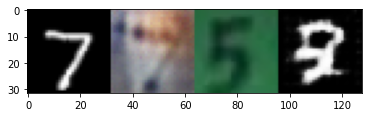

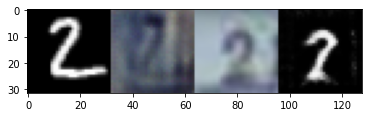

it[1100/4685] 	Loss_D:2.1344 	Loss_G:2.0962 	Loss_C:0.1378 	elapsed_time:1.94mins
it[1200/4685] 	Loss_D:2.0524 	Loss_G:2.1269 	Loss_C:0.1549 	elapsed_time:2.11mins
it[1300/4685] 	Loss_D:1.9915 	Loss_G:2.3339 	Loss_C:0.1455 	elapsed_time:2.27mins
it[1400/4685] 	Loss_D:2.1797 	Loss_G:2.0026 	Loss_C:0.1591 	elapsed_time:2.44mins
it[1500/4685] 	Loss_D:1.9533 	Loss_G:2.3738 	Loss_C:0.1651 	elapsed_time:2.61mins
it[1600/4685] 	Loss_D:2.4156 	Loss_G:2.0375 	Loss_C:0.1444 	elapsed_time:2.78mins
it[1700/4685] 	Loss_D:2.3357 	Loss_G:2.1656 	Loss_C:0.1595 	elapsed_time:2.95mins
it[1800/4685] 	Loss_D:2.2766 	Loss_G:1.9044 	Loss_C:0.1383 	elapsed_time:3.13mins
it[1900/4685] 	Loss_D:2.1975 	Loss_G:1.9154 	Loss_C:0.1494 	elapsed_time:3.29mins
it[2000/4685] 	Loss_D:2.3124 	Loss_G:1.9051 	Loss_C:0.1337 	elapsed_time:3.46mins


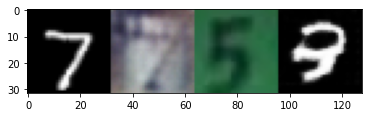

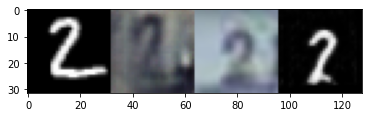

it[2100/4685] 	Loss_D:2.2295 	Loss_G:2.2069 	Loss_C:0.1428 	elapsed_time:3.68mins
it[2200/4685] 	Loss_D:2.1475 	Loss_G:2.5103 	Loss_C:0.1545 	elapsed_time:3.85mins
it[2300/4685] 	Loss_D:2.1955 	Loss_G:1.9923 	Loss_C:0.1396 	elapsed_time:4.02mins
it[2400/4685] 	Loss_D:2.2557 	Loss_G:2.4537 	Loss_C:0.1470 	elapsed_time:4.19mins
it[2500/4685] 	Loss_D:2.0934 	Loss_G:2.4166 	Loss_C:0.1384 	elapsed_time:4.36mins
it[2600/4685] 	Loss_D:2.1513 	Loss_G:1.9327 	Loss_C:0.1468 	elapsed_time:4.52mins
it[2700/4685] 	Loss_D:2.6106 	Loss_G:1.9693 	Loss_C:0.1374 	elapsed_time:4.69mins
it[2800/4685] 	Loss_D:2.3224 	Loss_G:2.2210 	Loss_C:0.1523 	elapsed_time:4.87mins
it[2900/4685] 	Loss_D:2.2626 	Loss_G:2.1961 	Loss_C:0.1301 	elapsed_time:5.05mins
it[3000/4685] 	Loss_D:2.1851 	Loss_G:2.1556 	Loss_C:0.1391 	elapsed_time:5.22mins


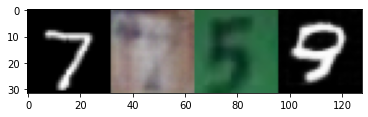

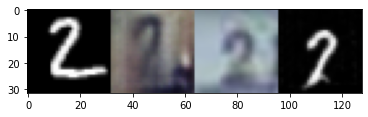

it[3100/4685] 	Loss_D:2.4289 	Loss_G:2.1821 	Loss_C:0.1612 	elapsed_time:5.42mins
it[3200/4685] 	Loss_D:2.2797 	Loss_G:1.9826 	Loss_C:0.1212 	elapsed_time:5.59mins
it[3300/4685] 	Loss_D:2.1829 	Loss_G:2.5643 	Loss_C:0.1397 	elapsed_time:5.75mins
it[3400/4685] 	Loss_D:2.3785 	Loss_G:2.1474 	Loss_C:0.1347 	elapsed_time:5.92mins
it[3500/4685] 	Loss_D:2.2420 	Loss_G:2.1822 	Loss_C:0.1558 	elapsed_time:6.09mins
it[3600/4685] 	Loss_D:2.0541 	Loss_G:2.3544 	Loss_C:0.1427 	elapsed_time:6.26mins
it[3700/4685] 	Loss_D:2.3325 	Loss_G:1.9033 	Loss_C:0.1363 	elapsed_time:6.44mins
it[3800/4685] 	Loss_D:2.3019 	Loss_G:2.0003 	Loss_C:0.1368 	elapsed_time:6.61mins
it[3900/4685] 	Loss_D:2.2892 	Loss_G:2.2861 	Loss_C:0.1258 	elapsed_time:6.78mins
it[4000/4685] 	Loss_D:2.2820 	Loss_G:2.1033 	Loss_C:0.1311 	elapsed_time:6.95mins


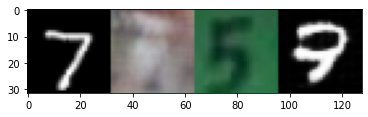

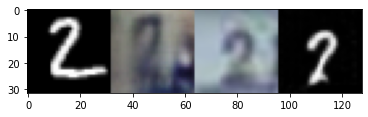

it[4100/4685] 	Loss_D:2.4535 	Loss_G:1.8743 	Loss_C:0.1398 	elapsed_time:7.15mins
it[4200/4685] 	Loss_D:2.0923 	Loss_G:2.3723 	Loss_C:0.1336 	elapsed_time:7.34mins
it[4300/4685] 	Loss_D:2.1463 	Loss_G:2.3599 	Loss_C:0.1259 	elapsed_time:7.50mins
it[4400/4685] 	Loss_D:2.1455 	Loss_G:2.2299 	Loss_C:0.1418 	elapsed_time:7.68mins
it[4500/4685] 	Loss_D:2.1894 	Loss_G:2.1169 	Loss_C:0.1332 	elapsed_time:7.87mins
it[4600/4685] 	Loss_D:2.3026 	Loss_G:2.3034 	Loss_C:0.1474 	elapsed_time:8.06mins


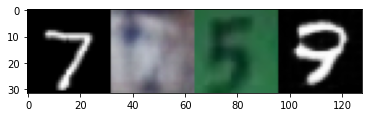

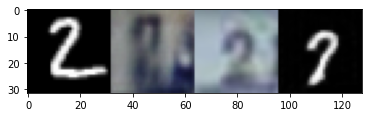

In [13]:
print('STEP 7: TRAIN THE MODEL')

label_real = torch.full((bs, 1, 8, 8), real_label, dtype=torch.float32, device=device)
label_fake = torch.full((bs, 1, 8, 8), fake_label, dtype=torch.float32, device=device)

num_iter = 0
max_iter = num_epochs*len(train_X_loader)

train_start_time = time.time()
for epoch in range(1, num_epochs+1):
    for batch_index, data_X in enumerate(train_X_loader):
        model_G_X.train()
        model_G_Y.train()
        model_D_X.train()
        model_D_Y.train()
        
        data_X = data_X[0].to(device)
        data_Y = next(iter(train_Y_loader))[0].to(device)
        
        ### Update discriminator model
        
        #############
        model_D_X.zero_grad()
        model_D_Y.zero_grad()
        
        #discrimination loss
        
        #loss for D_X
        out_D_X_real = model_D_X(data_X)
        err_D_X_real = criterion_GAN(out_D_X_real, label_real)
        gen_G_X = model_G_Y(data_Y)
        out_D_X_fake = model_D_X(gen_G_X.detach())#G(Y)의 gradient flow 차단
        err_D_X_fake = criterion_GAN(out_D_X_fake, label_fake)
        err_D_X = err_D_X_real + err_D_X_fake

        #loss for D_Y
        out_D_Y_real = model_D_Y(data_Y)
        err_D_Y_real = criterion_GAN(out_D_Y_real, label_real)
        gen_G_Y = model_G_X(data_X)
        out_D_Y_fake = model_D_Y(gen_G_Y.detach())#G(X)의 gradient flow 차단
        err_D_Y_fake = criterion_GAN(out_D_Y_fake, label_fake)
        err_D_Y = err_D_Y_real + err_D_Y_fake
        
        err_D = err_D_X + err_D_Y
        
        err_D.backward()    
        
        optimizer_D_X.step()
        optimizer_D_Y.step()
        
        #############
        

        ### Update generator model
        
        #############
        model_G_X.zero_grad()
        model_G_Y.zero_grad()  
        
        #generation loss
        out_D_G_X = model_D_X(model_G_Y(data_Y))
        err_G_X = criterion_GAN(out_D_G_X, label_real)
        out_D_G_Y = model_D_Y(model_G_X(data_X))
        err_G_Y = criterion_GAN(out_D_G_Y, label_real)
        err_G = err_G_X + err_G_Y
 
        #cycle loss
        cycle_X = model_G_Y(model_G_X(data_X))
        cycle_Y = model_G_X(model_G_Y(data_Y))
        
        err_cycle_X = criterion_L1(cycle_X, data_X)
        err_cycle_Y = criterion_L1(cycle_Y, data_Y)
        err_C = err_cycle_X + err_cycle_Y
        
        err_GC = err_G + 10*err_C
        
        err_GC.backward()
        
        optimizer_G_X.step()
        optimizer_G_Y.step()
        
        #############
        num_iter += 1
        # Output training stats
        if num_iter%100 == 0:
            print('it[{:04d}/{:04d}] \tLoss_D:{:.4f} \tLoss_G:{:.4f} \tLoss_C:{:.4f} \telapsed_time:{:.2f}mins'.format(
                num_iter, max_iter, err_D.item(), err_G.item(), err_C.item(), (time.time()-train_start_time)/60 
            ))

        if num_iter%1000==0 or num_iter==max_iter:
            save_name = osp.join(save_dir, 'it{:04d}.pt'.format(num_iter))
            torch.save({
                'model_G_X': model_G_X.state_dict(),
                'model_G_Y': model_G_Y.state_dict()
            }, save_name)
    
            with torch.no_grad():
                model_G_X.eval()
                model_G_Y.eval()
                for test_index, data_X in enumerate(test_X_loader):
                    if test_index == 0:
                        
                        data_X = data_X[0].to(device)
                        data_Y = next(iter(test_Y_loader))[0].to(device)

                        output_X = model_G_X(data_X)
                        output_Y = model_G_Y(data_Y)
                        
                        data_X = ((data_X+1)/2).cpu().data.numpy()
                        data_Y = ((data_Y+1)/2).cpu().data.numpy()

                        output_X = ((output_X + 1)/2).cpu().data.numpy()
                        output_Y = ((output_Y + 1)/2).cpu().data.numpy()
                
                        for vis_idx in range(vis_num):
                            data_X_, data_Y_ = gray2rgb(transpose(data_X)[vis_idx]), transpose(data_Y)[vis_idx]
                            output_X_, output_Y_  = transpose(output_X)[vis_idx], gray2rgb(transpose(output_Y)[vis_idx])
                            outputs = np.concatenate((data_X_, output_X_, data_Y_, output_Y_), axis=1)
                            plt.imshow(outputs)
                            plt.pause(0.001)

### *References*

이번에는 cycleGAN을 구현을 했다. cycleGAN은 Paired 이미지로 학습을 할 필요 없이 unpaired 데이터로 학습할 수 있게 해주는 model이다. cycleGAN의 핵심은 이미지를 변환하고 변환한 이미지를 다시 변환시키는 cycle과정이다. 이 cycleGAN에서는 GAN의 성능을 더 향상시키기 위해 L1 loss를 사용하는데 이 L1 loss를 쓰면 흐림 현상이 덜 발생한다. 요구사항에서 L1 loss를 cycle loss로 소개해서 이 loss를 cycle loss로 정의했고 논문에 나온 것처럼 10배를 해서 generation loss랑 더해주었다.

결과를 살펴보면 MNIST에서 SVHN으로의 결과는 흐릿하지만 숫자가  꽤 정확한데 (ex. 7->7 2->2) SVHN에서 MNIST로는 숫자가 정확하지 않은 것을 볼 수 있다. ( ex. 5->9) 이는 애초에 SVHN의 content 자체가 명확하지 않기 때문에 명확한 content를 생성하지 못한다고 생각한다. SVHN은 화질도 좋지 않고 channel도 3개라 명확한 숫자값을 생성하는 것에 어려움이 있다고 생각된다. 실제로 iteration이 적을 때에는 blurry하지만 본래 숫자값에 가까운 모습의 이미지를 생성하지만, iteration이 지날수록 더 선명해지고 숫자값은 본래 숫자값이랑 다른 모습을 생성한다.